# AS5001 (SUPA-AAA) Advanced (Astronomical) Data Analysis

-----

Brian Murphy 

Brian.Murphy@ed.ac.uk

University of Edinburgh 

Institute for Astronomy


#### Project 2: Deadline 5 pm Wed 23 Nov 2022

-----

## Hunting a Black Hole in GS2000

In the close binary system GS2000, a late-type main-sequence star
orbits around a compact object surrounded by an accretion disk.
GS2000 is a "soft X-ray transient" discovered during an outburst
of the disk when it became a bright X-ray source due to temporarily
increased rate of accretion onto the compact object.
The compact object is suspected to be a black hole,
but it could also be a neutron star.  Theory suggests that
the maximum mass possible for a neutron star is about 3 solar masses.

The goal of this project is to use data analysis techniques learned
in the lectures to estimate the mass of the compact object
in GS2000, and hence to determine if it is likely to be a black hole.
To measure the compact object mass, the strategy is to measure
the period and orbital velocity of the companion star,
and then apply Kepler's law.

The 10-m Keck telescope on Mauna Kea in Hawaii has been used to
obtain 13 spectra of GS2000 at 13 different binary phases.
The spectra include light both from the companion star and from
the accretion disk.  They were taken a few years after the outburst,
when accretion disk had faded considerably, so that the companion star
makes a substantial contribution to the spectrum.

Because GS2000 is quite faint, spectra are rather noisy
even with the CCD spectrograph on the 10m Keck telescope.
The H$\alpha$ emission line from the quiescent accretion disk is readily
visible, with a characteristic double-peaked velocity profile.
But it is not easy to spot absorption lines from the companion star
in the individual spectra.
For this reason a cross-correlation analysis is needed to detect
the radial velocity of the companion star at each of the 13 phases.
A number of bright main sequence stars were observed to provide
"template" spectra, in which the locations of absorption lines
are easily visible.

The techniques required have been developed in the lectures and homework sets.
Steps of the cross-correlation radial velocity analysis may be as follows:


-----

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
from astropy.stats import sigma_clip
from matplotlib import cm
from scipy.optimize import curve_fit
import math

In [97]:
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 14

----

### 1.)

### Plot on a single page the template star spectra, arranged by spectral type, and normalised to a common continuum level, to show how absorption line ratios change with spectral type. [5]



In [183]:
files1 = glob.glob('/Users/s2328788/Documents/phd_first_year/coursework/supa_p2/keck/template_stars/*.dat') 
files1.sort() 

spectral_types = ['g5', 'g9', 'k0', 'k1', 'k2', 'k4', 'k5', 'k7', 'k8', 'm0']

data_spectral_types = {}
for f, files in enumerate(files1):
    data_spectral_types[spectral_types[f]] = pd.read_csv(files, delim_whitespace=True, header=None)
    data_spectral_types[spectral_types[f]].columns = ['wavelength', 'flux', 'error']

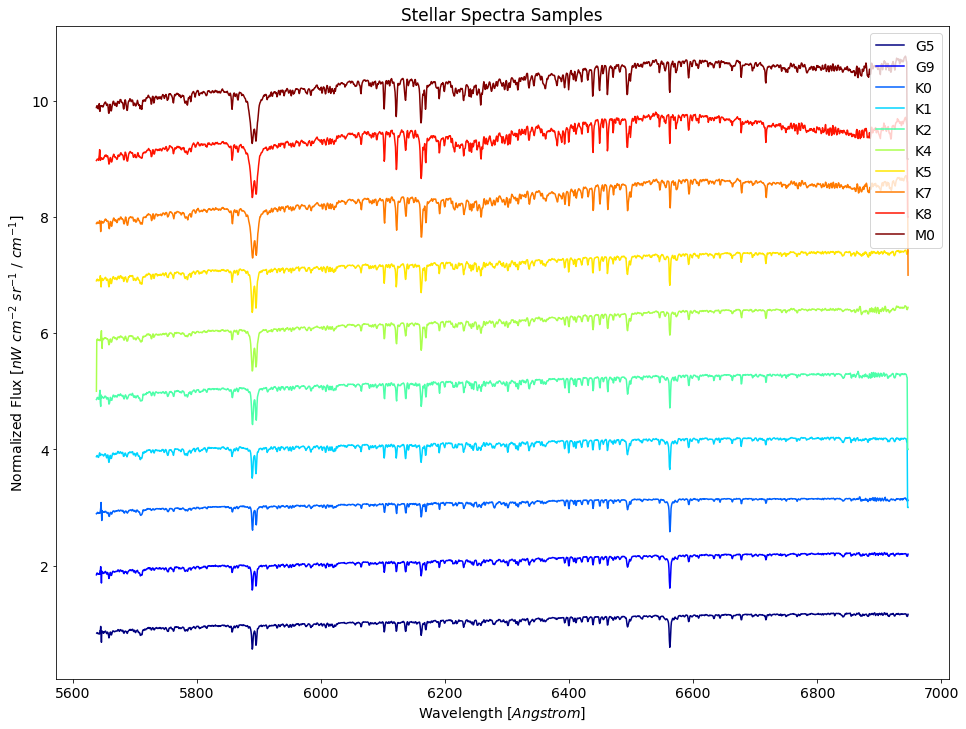

In [184]:
plt.title(r'Stellar Spectra Samples')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Normalized Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$')
for i, star in enumerate(data_spectral_types):
    lambdas = data_spectral_types[star].wavelength
    flux = data_spectral_types[star].flux 
    mmflux = flux[len(flux)//2]
    nflux = flux/mmflux
    colors = [cm.jet(x) for x in np.linspace(0, 1, len(spectral_types))]
    plt.plot(lambdas, nflux+i, label=star.upper(), color=colors[i])
    plt.legend(loc='upper right')
plt.show()
print('\n')
print('\n')

-----

### 2.)

### Plot on a single page, ordered by binary phase, the 13 spectra of GS2000, to show the shape of the continuum and the changing profile of the H-alpha emission line. [5]

In [185]:
files2 = glob.glob('/Users/s2328788/Documents/phd_first_year/coursework/supa_p2/keck/GS2000/*.dat')
files2.sort() 

bphase = [-0.1405, -0.0583, 0.0325, 0.0998, 0.1740, 0.2310, 0.3079, 0.3699, 0.4388, 0.5008, 0.5698, 0.6371, 0.7276 ]
dates = ['2449920.80713', '2449920.83542', '2449920.86667', '2449920.88982', '2449920.91539', '2449920.93501', '2449920.96145', '2449920.98281', '2449921.00649', '2449921.02784', '2449921.05158', '2449921.07473', '2449921.10589']

GS2000_dat = {}
for f, file in enumerate(files2):
    GS2000_dat[bphase[f]] = pd.read_csv(file, delim_whitespace=True, header=None)
    GS2000_dat[bphase[f]].columns = ['wavelength', 'flux', 'error'] 

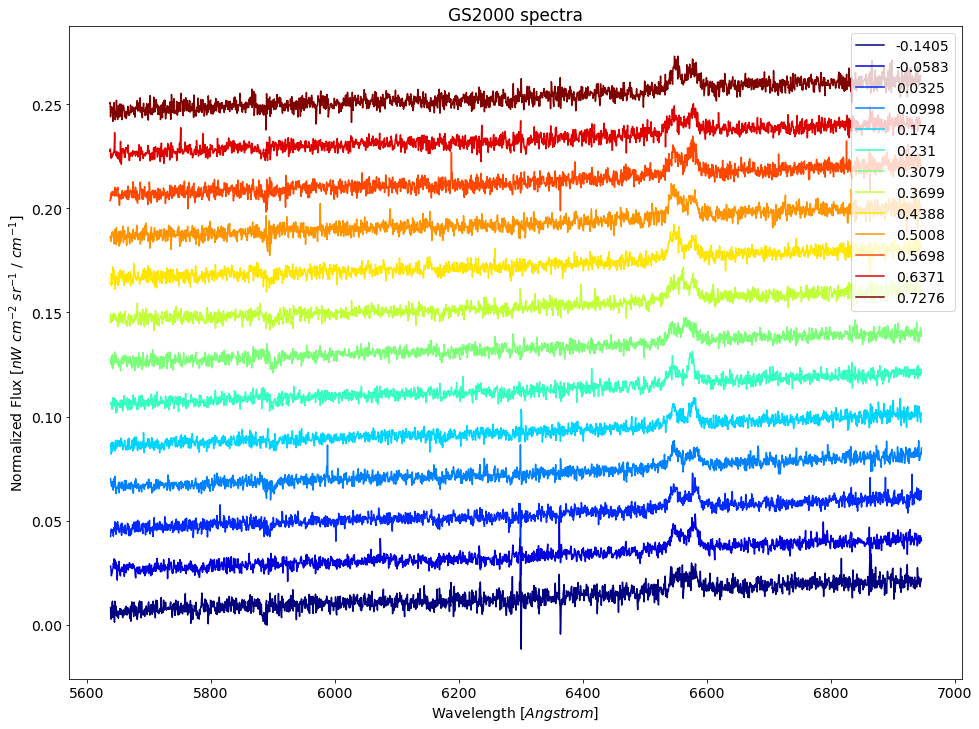

In [186]:
plt.title(r'GS2000 spectra')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Normalized Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$')
for i, spectrum in enumerate(GS2000_dat):
    lambdas = GS2000_dat[spectrum].wavelength 
    flux = GS2000_dat[spectrum].flux
    colors = [cm.jet(x) for x in np.linspace(0, 1, len(bphase))]
    plt.plot(lambdas, flux+i*0.02, label=spectrum, color=colors[i])
    plt.legend(loc='upper right')
plt.show()
print('\n')
print('\n')

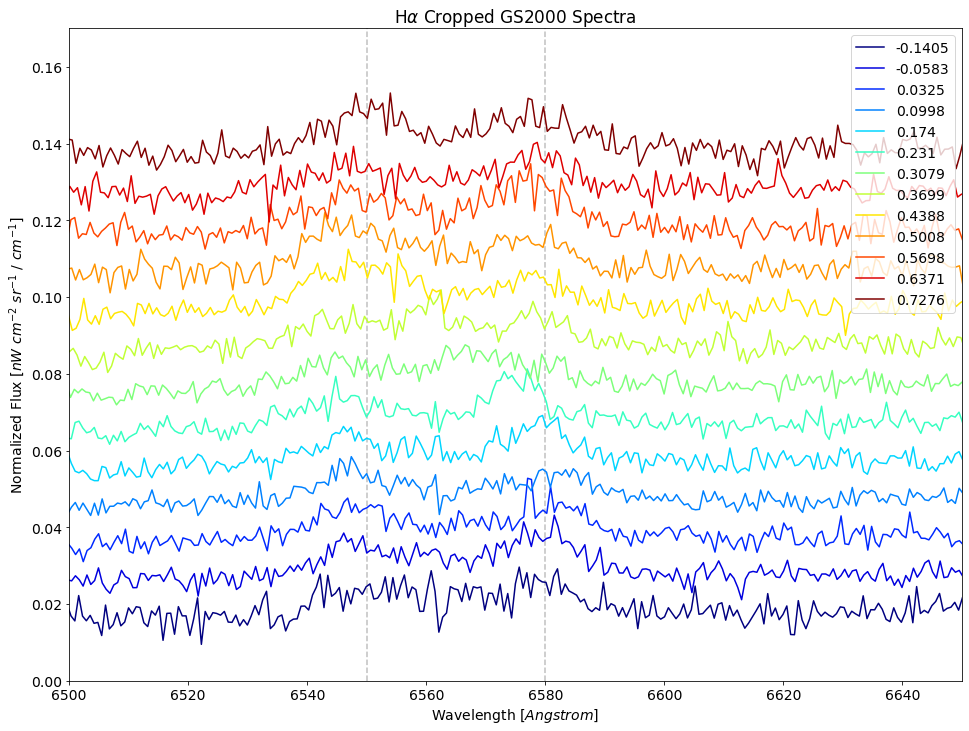

In [102]:
plt.xlim(6500, 6650)
plt.ylim(.0, .17)
plt.axvline(6550,color='grey',alpha=0.5,linestyle='--')
plt.axvline(6580,color='grey',alpha=0.5,linestyle='--')
plt.title(r'H$\alpha$ Cropped GS2000 Spectra')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Normalized Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$')
for i, spectrum in enumerate(GS2000_dat):
    lambdas = GS2000_dat[spectrum].wavelength
    flux = GS2000_dat[spectrum].flux
    plt.plot(lambdas, flux+i*0.01, label=spectrum, color=colors[i])
    plt.legend(loc='upper right')
plt.show()
print('\n')
print('\n')

--------

### 3.)

### Plot the average of the 13 spectra of GS2000.
### Are any of the expected absorption lines detected?
### What range of spectral types provides a good match? [5]

In [103]:
flxs = np.zeros(2041)
for spectrum in GS2000_dat:
    flxs += GS2000_dat[spectrum].flux
flxs = flxs/13

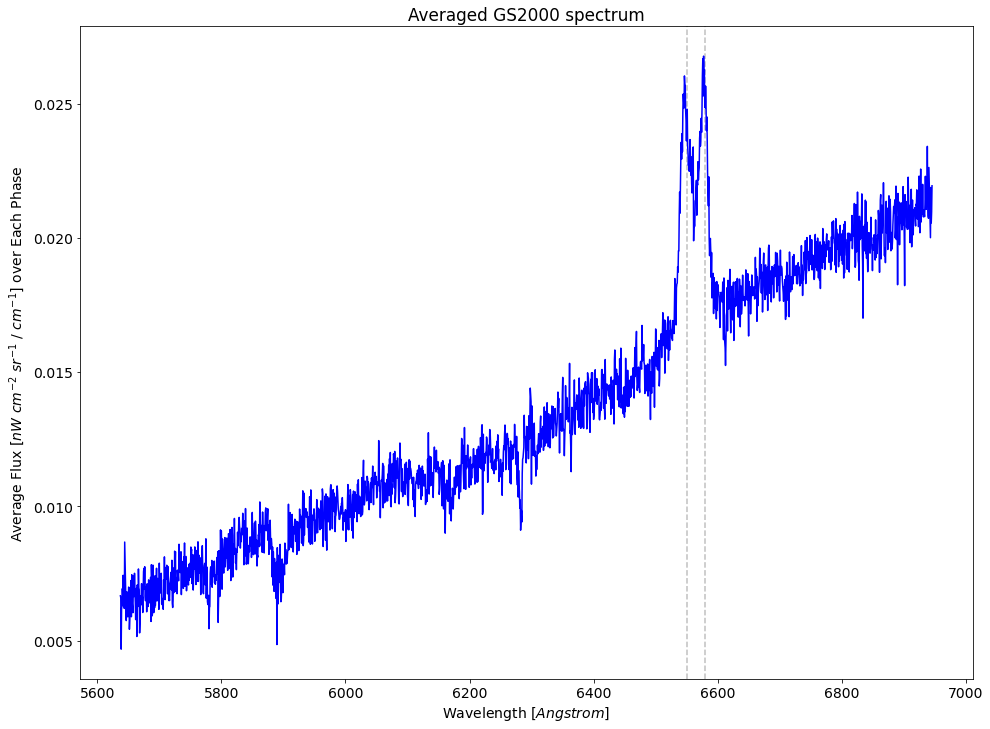

In [104]:
plt.title(r'Averaged GS2000 spectrum')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Average Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$ over Each Phase')
plt.axvline(6550,color='grey',alpha=0.5,linestyle='--')
plt.axvline(6580,color='grey',alpha=0.5,linestyle='--')
lambdas = GS2000_dat[spectrum].wavelength 
plt.plot(lambdas, flxs, color='b') 
plt.show()

### ANSWER: 

This spectrum roughly corresponds to the spectral types G5-K5. However, performing a more robust analysis of the normalized spectra below.

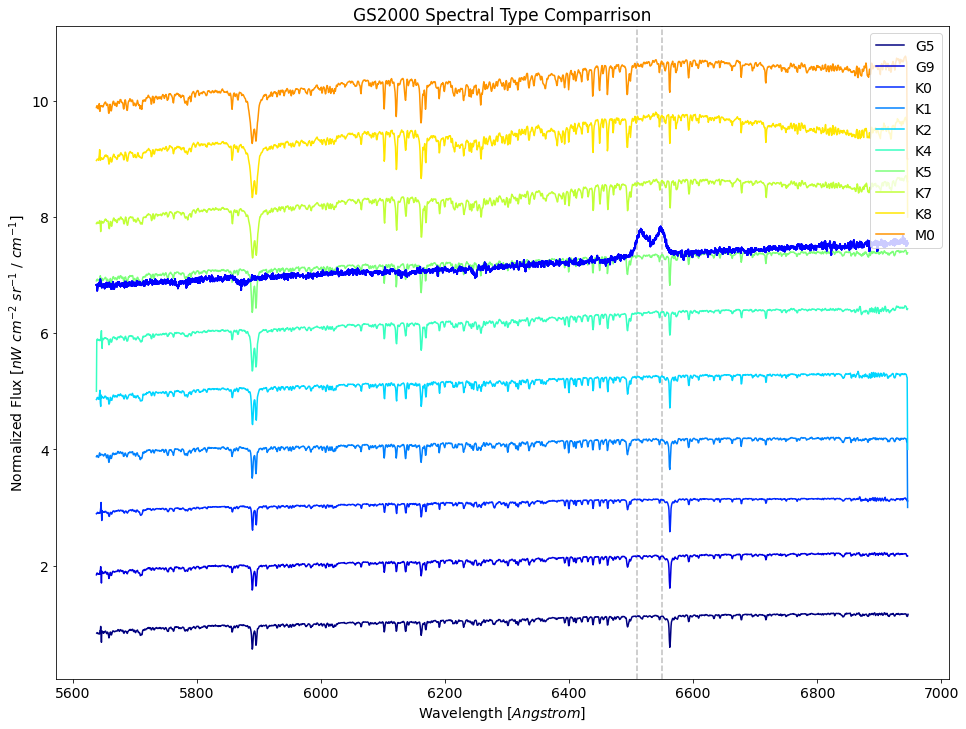

In [188]:
plt.title(r'GS2000 Spectral Type Comparrison')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Normalized Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$')
plt.axvline(6550,color='grey',alpha=0.5,linestyle='--')
plt.axvline(6510,color='grey',alpha=0.5,linestyle='--')
for i, star in enumerate(data_spectral_types):
    lambdas = data_spectral_types[star].wavelength 
    flux = data_spectral_types[star].flux 
    mmflux = flux[len(flux)//2]
    nflux = flux/mmflux
    x = lambdas[0:2040]
    y = nflux[0:2040]
    z = flxs[0:2040]*50+0.5
    plt.plot(x, y+i, label=star.upper(), color=colors[i])
    plt.plot(x, z+6, color='b') 
    plt.legend(loc='upper right')
plt.show()
print('\n')
print('\n')

In [189]:
def chisquared(data, model, error):
    chisquared = sum(((data - model)/error)**2)
    return chisquared
chi2 = []
for i, star in enumerate(data_spectral_types):
    lambdas = data_spectral_types[star].wavelength
    flux = data_spectral_types[star].flux
    mmflux = flux[len(flux)//2]
    nflux = flux/mmflux
    x = lambdas[0:2040]
    y = nflux[0:2040]
    z = flxs[0:2040]*50+0.5
    chi = np.sqrt((y-z)/z)
    chi = chi[~np.isnan(chi)]
    chi2.append(np.sum(chi))
if chi2[0] < 100:
    print('The best spectral match for GS2000 is: K5')
    print('\n')
    print('\n')

The best spectral match for GS2000 is: K5






/Users/s2328788/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


### ANSWER:

The expected absorpotion lines are seen in the range of 5900 angstrom, however, in the normalized GS2000 spectrum the expected absorption line is around 5850 angstrom, showing a general blueshift of the absorption line. This cooresponds with the overall higher radial velocity experienced by GS2000 by our reference frame.

Additionally, this absorption line is thought to be the Sodium D lines in the 5900 angstrom region of the K-family stars. It is noted by a deep and strong absorption feature, comprised of multiple overlapping sodium D bands.

#### REF: 

[1]McKellar, A., “Intense λ 6708 Resonance Doublet of Li I in the Spectrum of WZ Cassiopeiae”, <i>Publications of the Astronomical Society of the Pacific</i>, vol. 52, no. 310, p. 407, 1940. doi:10.1086/125241.

I would also like to reference Amanda Bystrom for helping with the coding of the project. My skills are limited when working with large datasets, and she helped me significantly with the importing and classification of datasets into wavelength, flux, and error.


------

### 4.)

### Fit a smooth function to the continuum of each of the spectra. Plot the average GS2000 spectrum divided by the fitted continuum, and do the same for the most suitable template spectrum. [10]

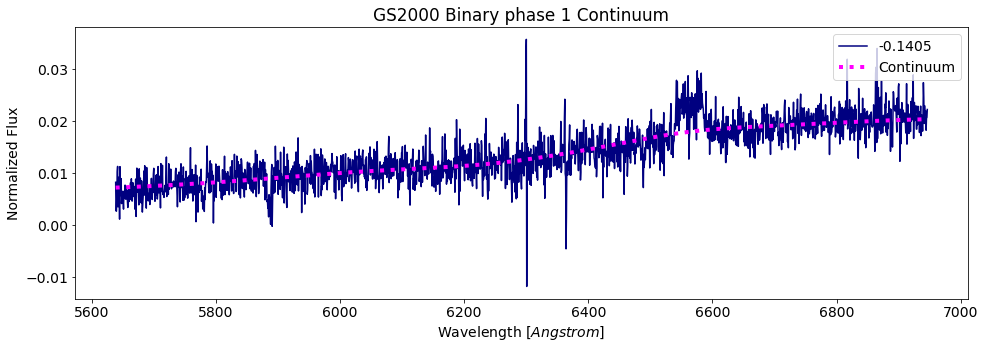

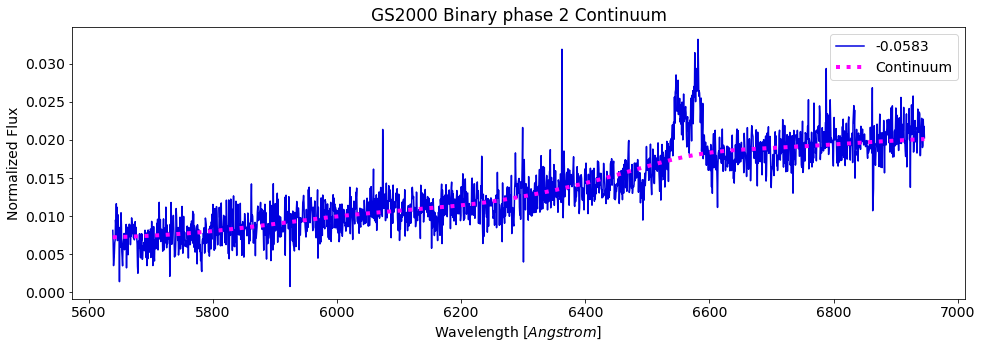

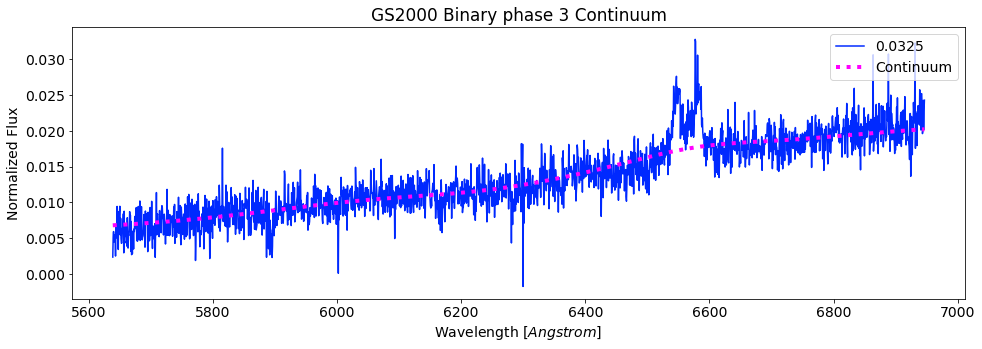

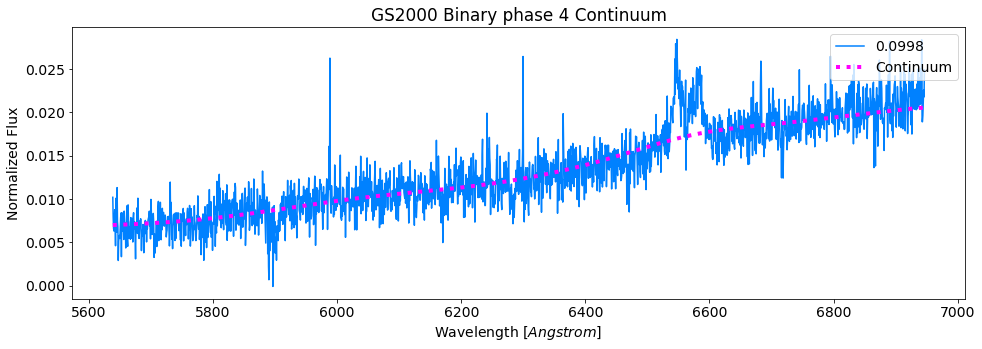

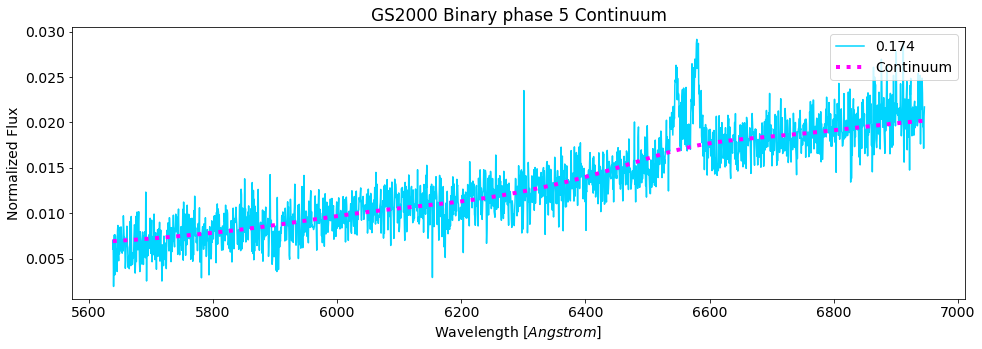

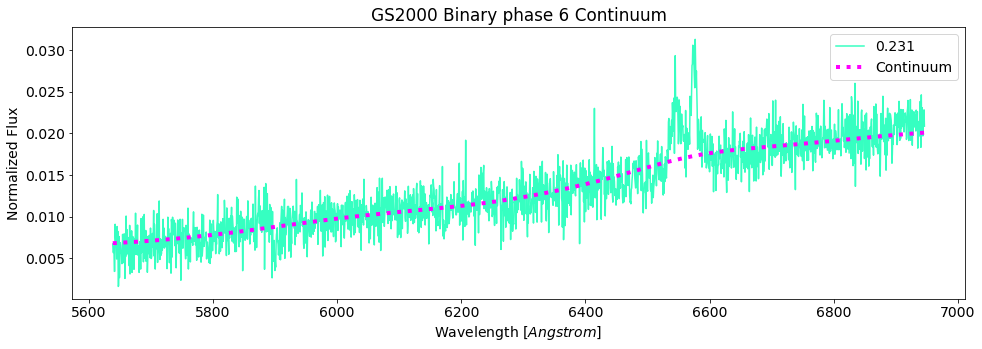

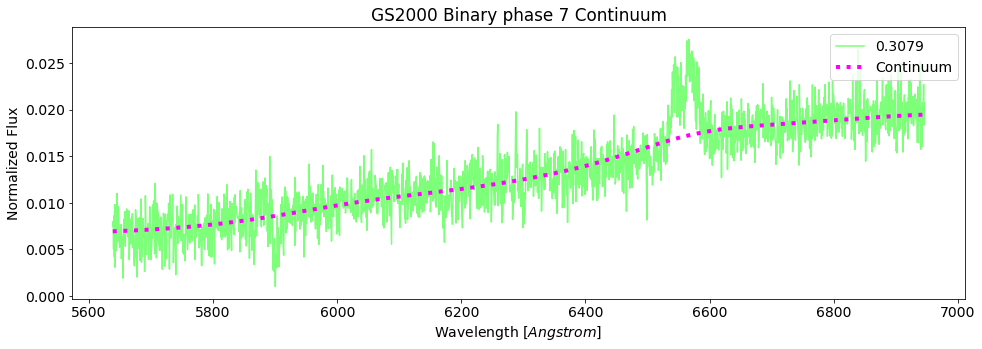

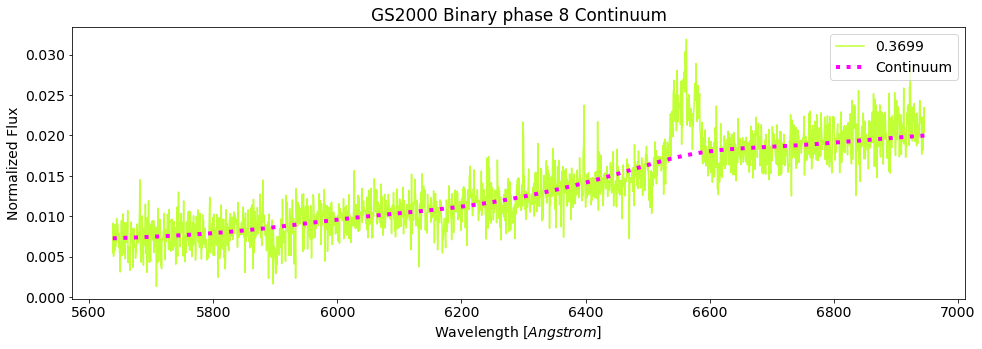

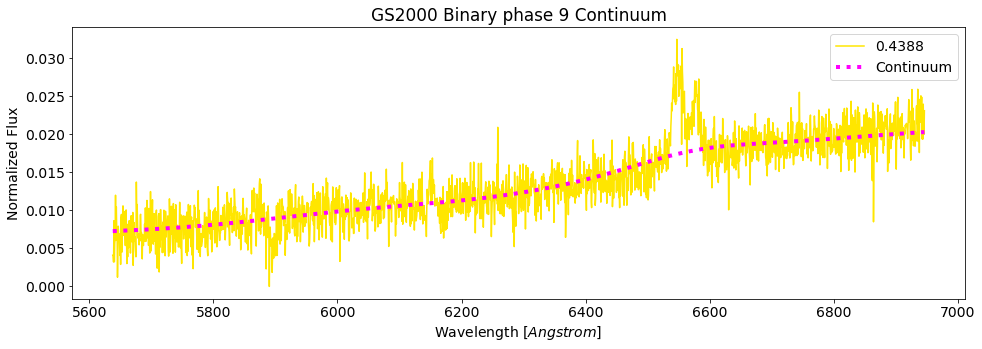

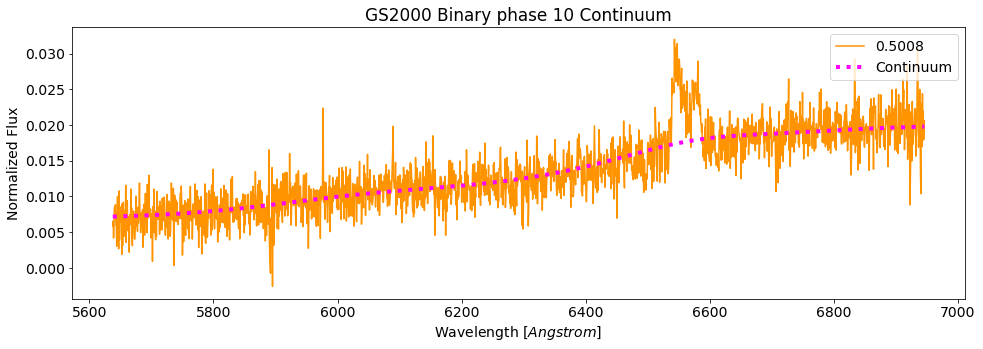

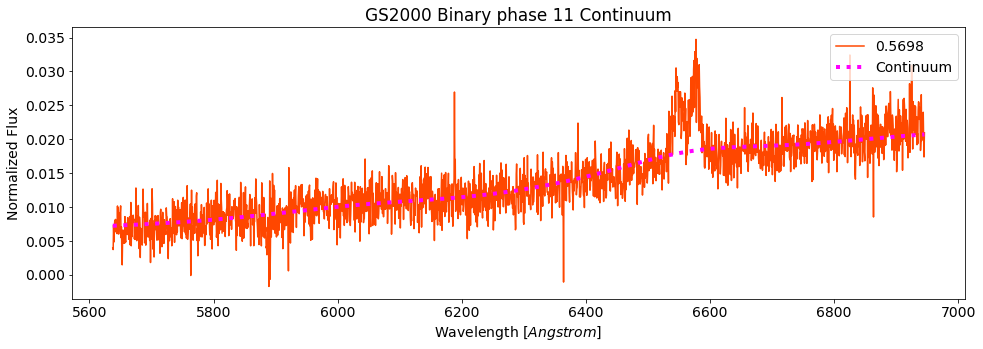

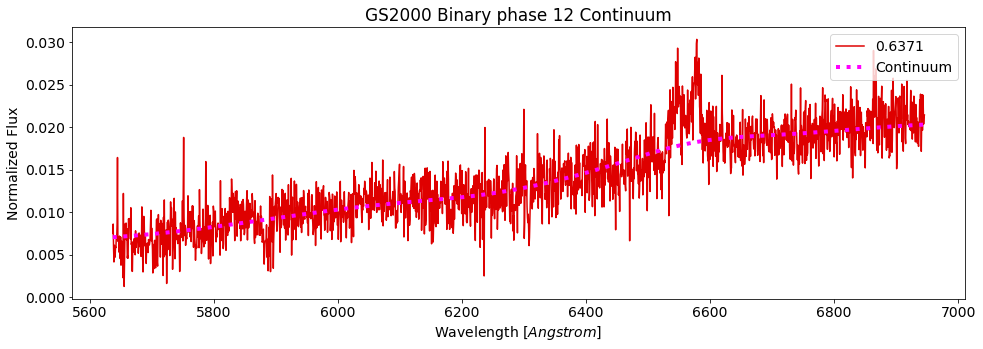

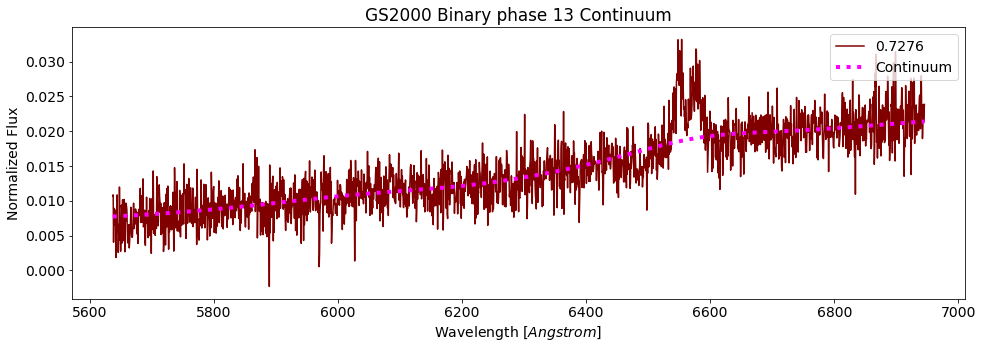

In [107]:
tau = 100.

def g_gauss(lamb):
    g_l = np.exp((-1./2.)*(lamb/tau)**2)
    return g_l

def gaussian_smooth(xlist, ylist, ysigma):
    opt_av = []
    opt_av_sig = []
    for i in range(len(xlist)):
        weight = 0.
        numerator = 0.
        unc = 0.
        for j in range(len(xlist)):
            weight = weight + ((g_gauss(xlist[i] - xlist[j]))/(ysigma[j]**2))
            numerator = numerator + (ylist[j]*((g_gauss(xlist[i] - xlist[j]))/(ysigma[j]**2)))                      
        unc = np.sqrt(1./weight)
        opt_av.append(numerator/weight)
        opt_av_sig.append(unc)
    return opt_av, opt_av_sig

for i, spectrum in enumerate(GS2000_dat):
    plt.figure(figsize=[16,5])
    plt.title(r'GS2000 Binary phase '+str(i+1)+' Continuum')
    plt.xlabel(r'Wavelength [$Angstrom$]')
    plt.ylabel(r'Normalized Flux')
    lambdas = GS2000_dat[spectrum].wavelength
    flux = GS2000_dat[spectrum].flux
    err = GS2000_dat[spectrum].error
    av, sig = gaussian_smooth(lambdas, flux, err)
    colors = [cm.jet(x) for x in np.linspace(0, 1, len(bphase))]
    plt.plot(lambdas, flux, label=spectrum, color=colors[i])
    plt.plot(lambdas, av, label='Continuum', color='magenta', ls='dotted',linewidth=4)
    plt.legend(loc='upper right')
    plt.show()
print('\n')
print('\n')

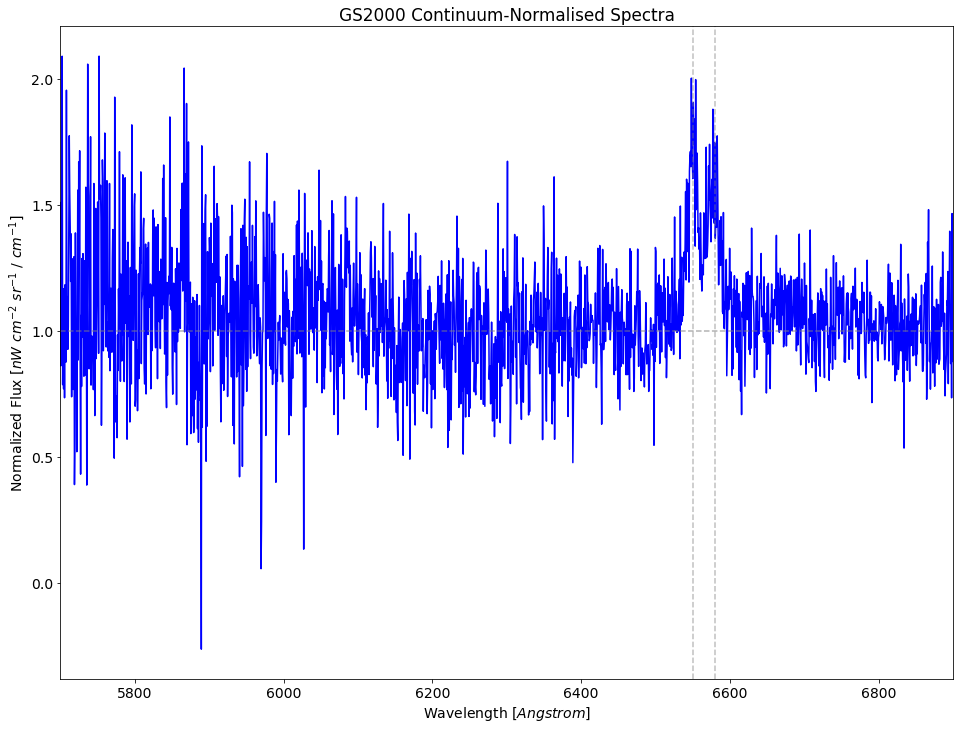

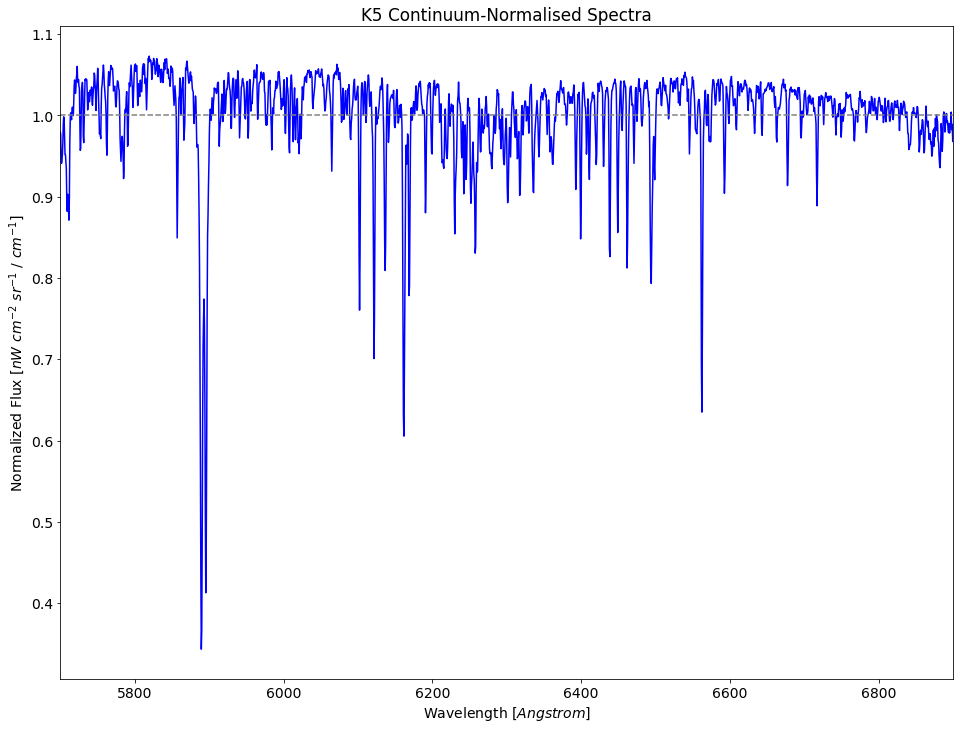

In [108]:
flxs = np.zeros(2041)

for spectrum in GS2000_dat:
    flxs += GS2000_dat[spectrum].flux
flxs = flxs/13
lambdas = GS2000_dat[spectrum].wavelength
clipflux = sigma_clip(flxs, sigma=2)
continuum = np.polyfit(lambdas, clipflux, 2)[0]*(lambdas**2) + np.polyfit(lambdas, clipflux, 2)[1]*lambdas + np.polyfit(lambdas, clipflux, 2)[2]
nflux = flux/continuum
plt.title('GS2000 Continuum-Normalised Spectra')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Normalized Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$')
plt.xlim(5700,6900)
plt.plot(lambdas, nflux, label='Continuum', color='b')
plt.axhline(1.0, ls='--', color='gray', alpha=0.6)
plt.axvline(6550,color='grey',alpha=0.5,linestyle='--')
plt.axvline(6580,color='grey',alpha=0.5,linestyle='--')
plt.show()

lambdas = data_spectral_types['k5'].wavelength 
flux = data_spectral_types['k5'].flux 
clipflux = sigma_clip(flux, sigma=2)
continuum = np.polyfit(lambdas, clipflux, 2)[0]*(lambdas**2) + np.polyfit(lambdas, clipflux, 2)[1]*lambdas + np.polyfit(lambdas, clipflux, 2)[2]
nflux = flux/continuum
plt.title('K5 Continuum-Normalised Spectra')
plt.xlabel(r'Wavelength [$Angstrom$]')
plt.ylabel(r'Normalized Flux $[nW \ cm^{-2} \ sr^{-1} \ / \ cm^{-1}]$')
plt.xlim(5700,6900)
plt.plot(lambdas, nflux, color='b')
plt.axhline(1.0, ls='dashed', color='gray')
plt.show()

print('\n')
print('\n')

------

### 5.)

### For each of the 13 spectra, measure the radial velocity by performing a cross-correlation analysis with the most suitable template spectrum. [25]

###  To accomplish this:
    
### (a) Subtract the continuum from the GS2000 spectrum, and from the template spectra.
    

In [140]:
crosscorr_GS2000 = {}
for i, spectrum in enumerate(GS2000_dat):
    crosscorr_GS2000[spectrum] = GS2000_dat[spectrum]
    lambdas = crosscorr_GS2000[spectrum].wavelength
    flux = crosscorr_GS2000[spectrum].flux
    clipflux = sigma_clip(flux, sigma=2)
    continuum = np.polyfit(lambdas, clipflux, 2)[0]*(lambdas**2) + np.polyfit(lambdas, clipflux, 2)[1]*lambdas + np.polyfit(lambdas, clipflux, 2)[2]
    crosscorr_GS2000[spectrum].flux -= continuum

crosscorr_template_spectra = {}
for i, spectrum in enumerate(data_spectral_types):
    crosscorr_template_spectra[spectrum] = data_spectral_types[spectrum]
    lambdas = crosscorr_template_spectra[spectrum].wavelength
    flux = crosscorr_template_spectra[spectrum].flux
    clipflux = sigma_clip(flux, sigma=2)
    continuum = np.polyfit(lambdas, clipflux, 2)[0]*(lambdas**2) + np.polyfit(lambdas, clipflux, 2)[1]*lambdas + np.polyfit(lambdas, clipflux, 2)[2]
    crosscorr_template_spectra[spectrum].flux -= continuum
    
print('\n')
print('\n')

### (b) Apply a velocity shift to the continuum-subtracted template spectrum.

In [141]:
def vel_shift(v):
    c = 3*1e5
    lambdas_velshifted = crosscorr_template_spectra['k5'].wavelength*(1 + (v/c))
    return lambdas_velshifted

print('\n')
print('\n')

### (c) & (d) Scale the shifted and continuum-subtracted template spectrum to fit the continuum-subtracted GS2000 spectrum. Repeat the above for a number of different velocities, and plot the $\chi^2$ of the fit as a function of the velocity shift.

In [142]:
def chisquared(data, model, error):
    chisquared = sum(((data - model)/error)**2)
    return chisquared

def CCF_func_final(d, d_l, dsig, temp_l, temp_y, scalefac, v):


    shift_l = np.zeros_like(temp_l)
    for i,l in enumerate(temp_l):
        shift_l[i] = delta_lambda(v, l)

    pattern = np.interp(d_l, shift_l, temp_y/scalefac)
    
    ccf = np.sum((d*pattern)/(dsig**2))/np.sum((pattern/dsig)**2)
    ccfvar = 1./np.sum((pattern/dsig)**2)
    chisq = np.sum(((d - (ccf*pattern))/dsig)**2)
    
    return ccf, ccfvar, chisq

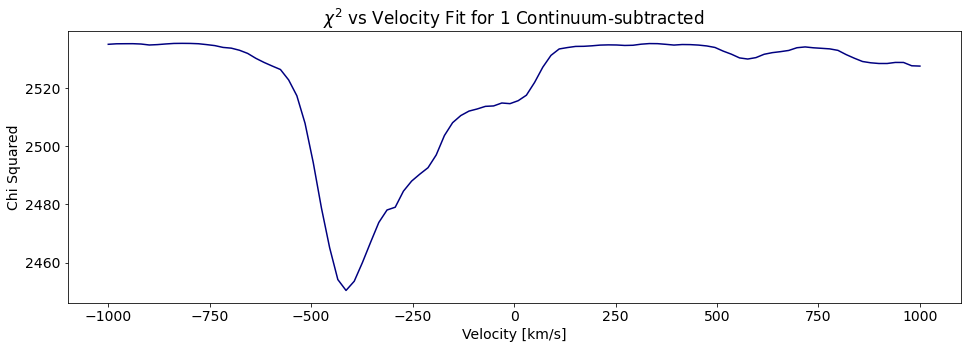

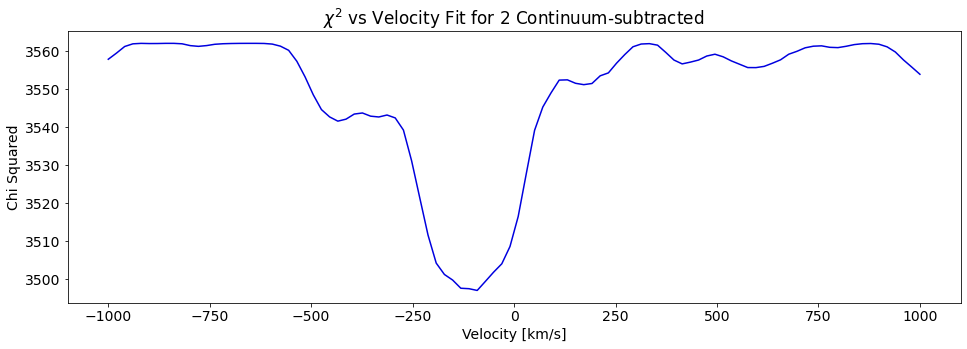

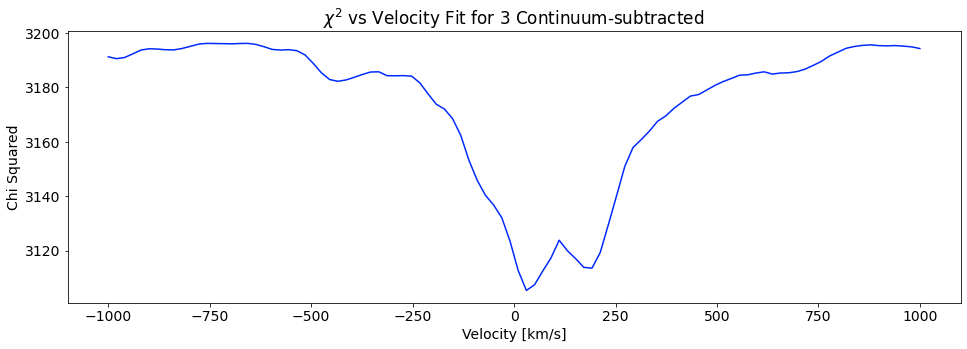

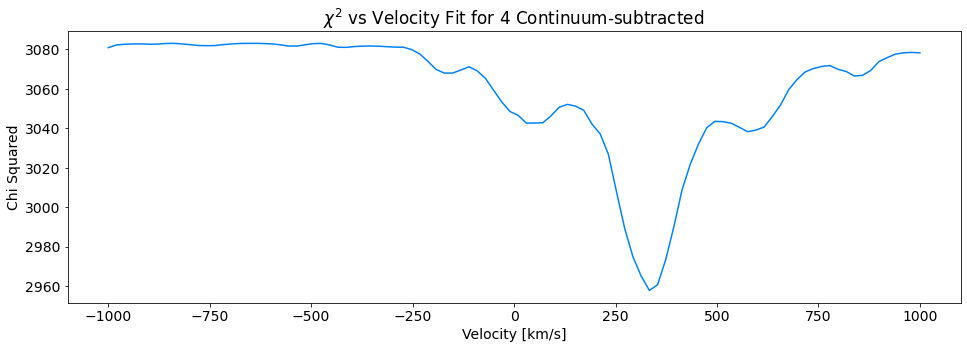

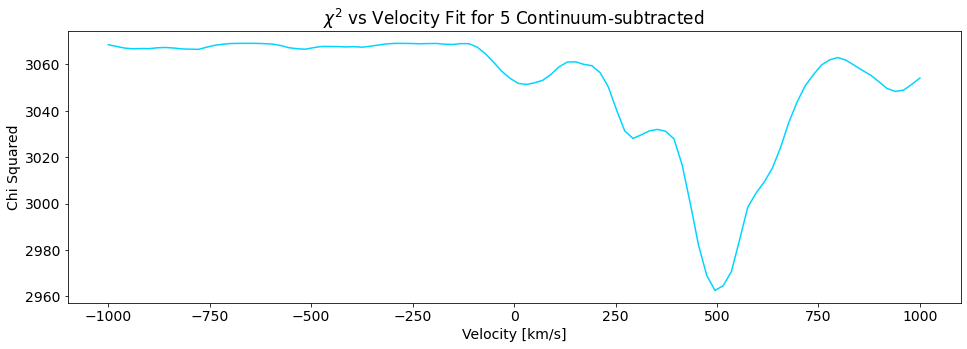

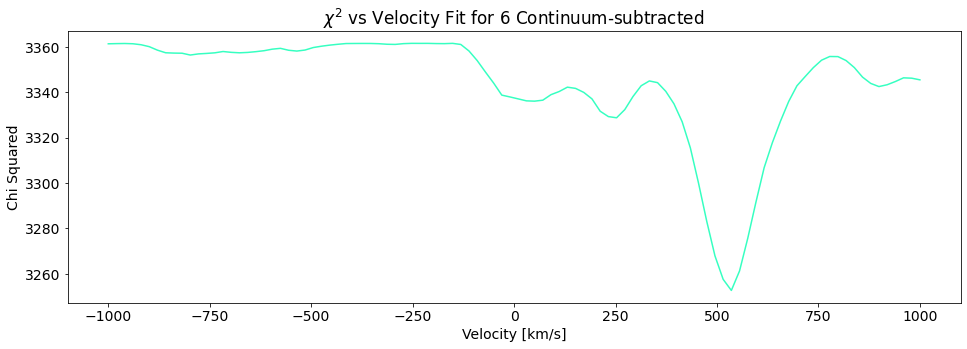

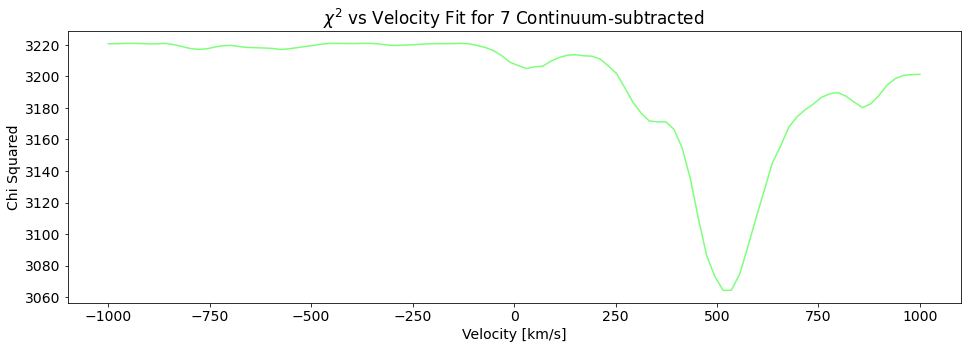

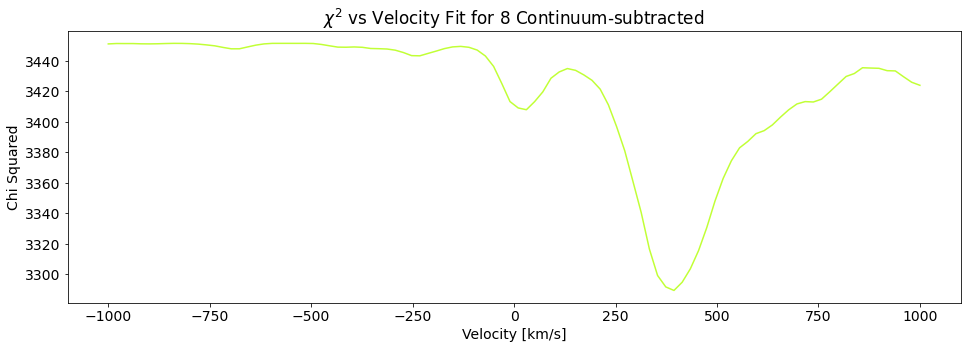

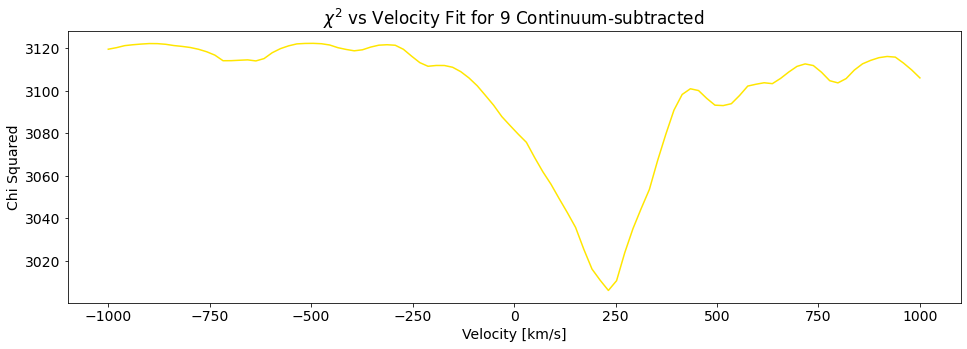

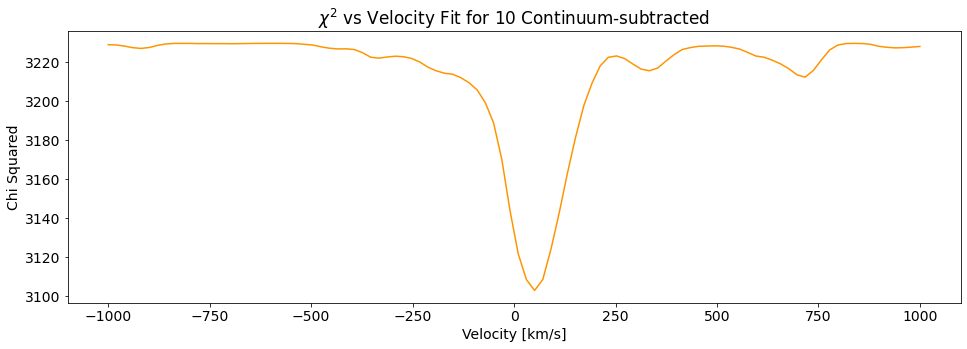

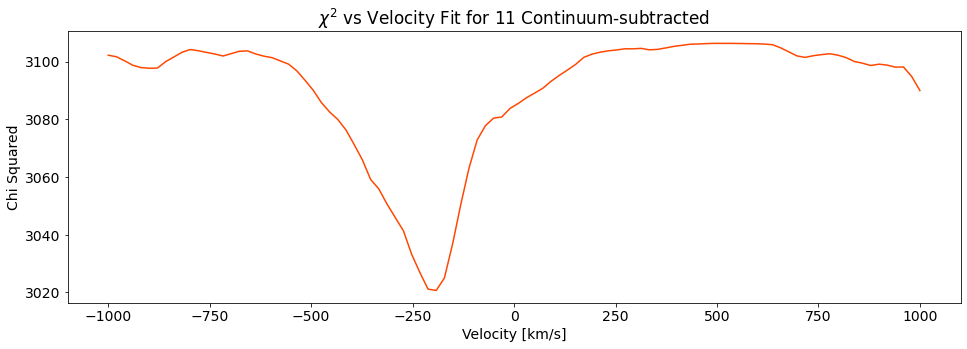

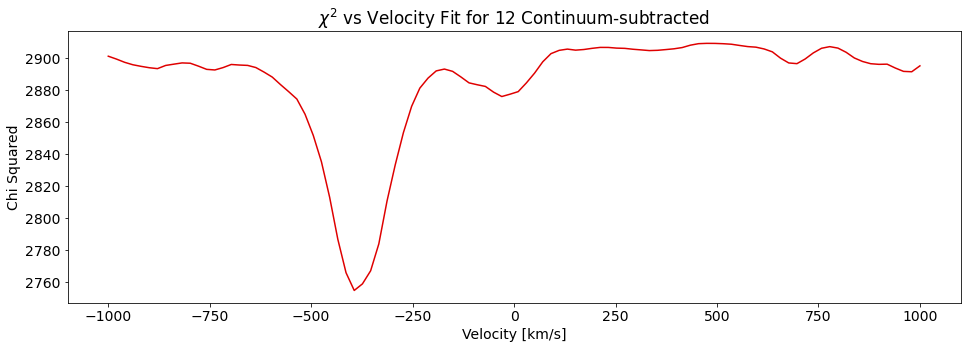

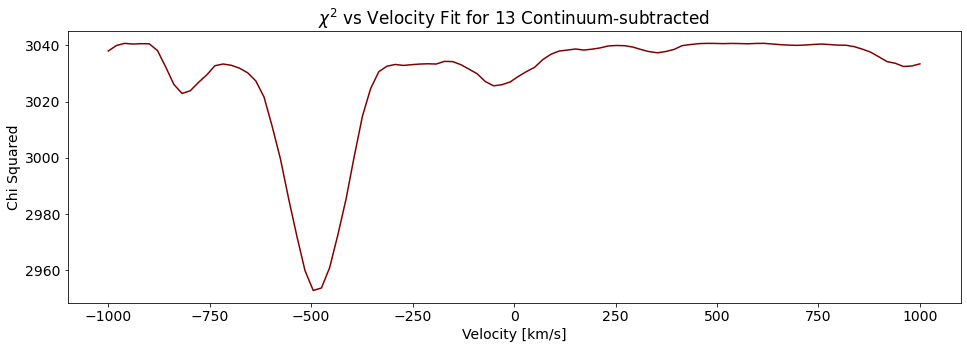

In [149]:
vels = np.linspace(-1e3, 1e3, num=100)
k5_flux = crosscorr_template_spectra['k5'].flux
chisquares = []

for i, spectrum in enumerate(crosscorr_GS2000):
    lambdas = crosscorr_GS2000[spectrum].wavelength
    flux = crosscorr_GS2000[spectrum].flux
    errs = crosscorr_GS2000[spectrum].error
    chisquares_spec = []
    for v in vels:
        k5_velshifted = vel_shift(v)
        P = np.interp(lambdas, k5_velshifted, k5_flux)
        A = sum((P*flux)/errs**2)/sum((P/errs)**2)
        mu = A*P
        chisquares_spec.append(chisquared(flux, mu, errs))
    chisquares.append(chisquares_spec)
    

for i, chi in enumerate(chisquares):
    plt.figure(figsize=[16,5])
    plt.title(r'$\chi^2$ vs Velocity Fit for '+str(i+1)+' Continuum-subtracted')
    plt.ylabel(r'Chi Squared')
    plt.xlabel(r'Velocity [km/s]')
    plt.plot(vels, chi, color=colors[i])
    plt.show()

print('\n')
print('\n')

### (e) Use the $\chi^2$ minimum to estimate the radial velocity and its 1-sigma uncertainty.

In [190]:
sig1 = sig[0:156]
sig2 = sig[157:313]
sig3 = sig[314:470]
sig4 = sig[471:627]
sig5 = sig[628:784]
sig6 = sig[785:941]
sig7 = sig[942:1098]
sig8 = sig[1099:1255]
sig9 = sig[1256:1412]
sig10 = sig[1413:1569]
sig11 = sig[1570:1726]
sig12 = sig[1727:1883]
sig13 = sig[1884:2040]

print('The best estimate for radial velocity is:', np.max(best_vels),'±', np.max(sig))
print('\n')
print('\n')

The best estimate for radial velocity is: 535.3535353535353 ± 0.00017478754729430317






------

### 6.)

### Plot the measured velocities and 1-sigma uncertainties as a function of binary phase. Put these results also  in a table in your report. [5]

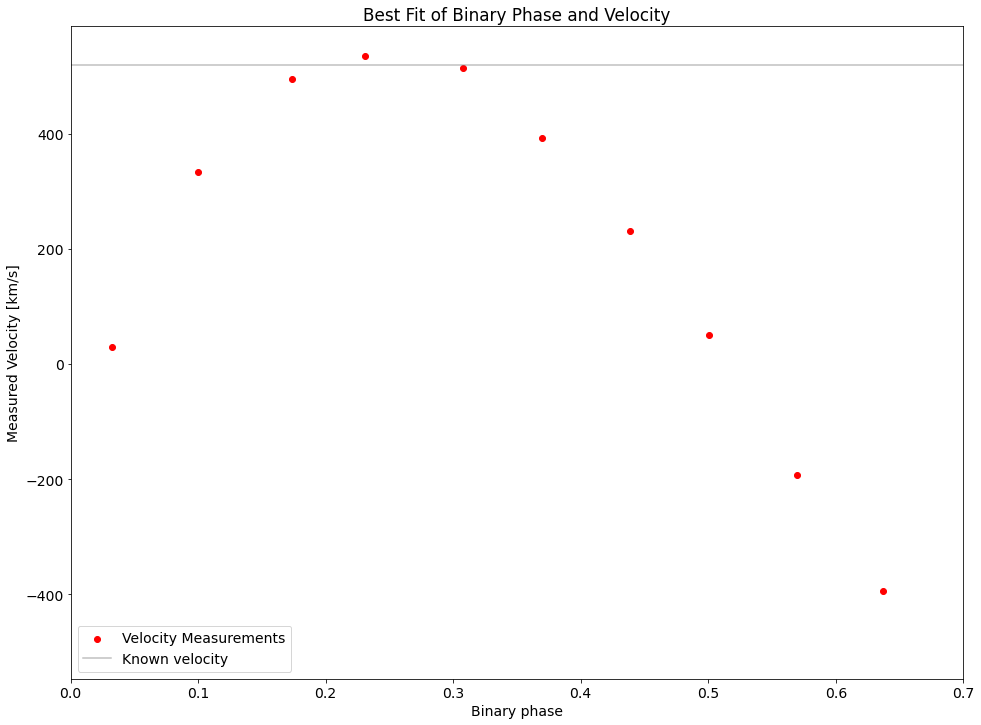

In [191]:
best_vels = vels[chisqmin]
plt.scatter(bphase, best_vels, color='r', marker='o',label='Velocity Measurements')
plt.axhline(520, color='gray', alpha=.5, label='Known velocity')
plt.xlim([0,0.7])
plt.title('Best Fit of Binary Phase and Velocity')
plt.xlabel('Binary phase')
plt.ylabel('Measured Velocity [km/s]')
plt.legend()
plt.show()

print('\n')
print('\n')

------

### 7.)

### Fit a sinusoidal velocity curve of the form $$ V(\phi) = \gamma + K_x  \sin{( 2\,\pi\,\phi)} + K_y  \cos{(2\,\pi\,\phi)} $$ to the 13 velocity measurements. Show the best fit velocity curve on your plot with the data points and error bars. [5]

In [192]:
def sinusoidal(phase, gamma, Kx, Ky):
    return gamma + Kx*np.sin(2*math.pi*phase) + Ky*np.cos(2*math.pi*phase)

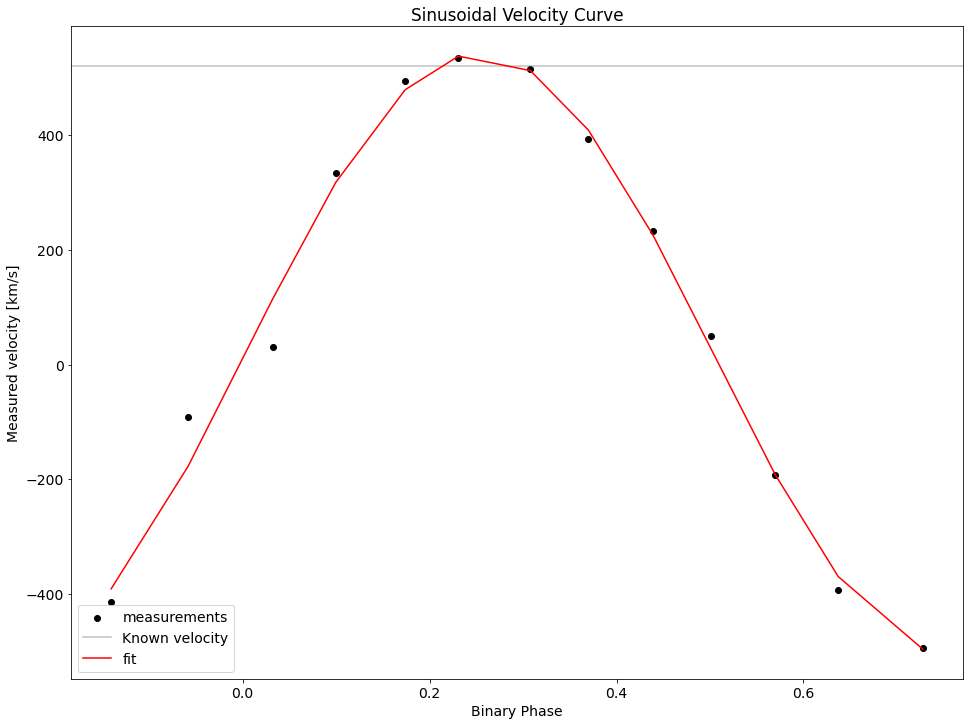

The errors of the Sinusoidal Velocity Curve are: 16.87844546902113 15.886400088742182






In [193]:
fit = curve_fit(sinusoidal, bphase, best_vels)
gamma = fit[0][0]
Kx = fit[0][1]
Ky = fit[0][2]
P = 0.34*24*60*60
Perr = 0.000002*24*60*60
pcov = np.sqrt(np.diag(fit[1]))
Kxerr = pcov[1]
Kyerr = pcov[2]
bphase = np.array(bphase)

plt.scatter(bphase, best_vels, color='k', marker='o',label='measurements')
plt.axhline(520, color='gray', alpha=.5, label='Known velocity')
plt.plot(bphase, sinusoidal(bphase, gamma, Kx, Ky), color='red',label='fit')
plt.xlabel('Binary Phase')
plt.ylabel('Measured velocity [km/s]')
plt.title('Sinusoidal Velocity Curve')
plt.legend()
plt.show()

print('The errors of the Sinusoidal Velocity Curve are:', Kxerr, Kyerr)
print('\n')
print('\n')

### 8.) 

### From your results, estimate the radial velocity semi-amplitude, $$	K = \left( {K_x}^2 + {K_y}^2 \right)^{1/2} $$ and its 1-$\sigma$ uncertainty. This is the orbit velocity of the companion star, projected by a factor $\sin{\left(i\right)}$ due to the inclination of the orbit. Describe your algorithm clearly and without unambiguity. [10]

In [194]:
K = np.sqrt(Kx**2 + Ky**2)

Kerr = np.sqrt((Kx**2 + Ky**2)**(-1)*(Kx**2*Kxerr**2 + Ky**2*Kyerr**2)) 

print('The velocity of the companion star is', K,  '±', Kerr, 'km/s.')
print('\n')
print('\n')

The velocity of the companion star is 523.1648513458986 ± 16.8780136393251 km/s.






------

### 9.)

### Give two expressions for the compact object mass function $f(M_x)$, the first in terms of the observable quantities $P$ and $K$, and the second in terms of the compact object mass $M_x$, the inclination $i$, and the mass ratio $q=M_c/M_x$, where $M_c$ is the companion star mass. From the binary period $P$ and your measured $K$ velocity, estimate $f(M_x)$ in solar units. Give also the 1-sigma uncertainty. [5]

In [195]:
P = 0.34*24*60*60
G = 6.67e-11
K = np.sqrt(Kx**2 + Ky**2)
K *= 1e3
Msun = 2e30
f = (K**3*P)/(2*math.pi*G)/Msun
ferr = np.sqrt(((3*K**2*P)/(2*math.pi*G))**2*Kerr**2 + ((K**3)/(2*math.pi*G))**2*Perr**2)/Msun

print('The compact object mass function in solar units is:', f, '±', ferr)
print('\n')
print('\n')

The compact object mass function in solar units is: 5.018485072605837 ± 0.0004866058496181706






------

### 10.) 

### Adopt a specific inclination $i=90^\circ$, and a specific $M_c=0.5~M_\odot$. For these choices, calculate the compact object mass $M_x$. Give the 1-$\sigma$ uncertainty, assuming that  $i$ and $M_c$ are known exactly. Be clear about your algorithm for estimating the uncertainties, and collect your results in a table in your report. [5]

In [196]:
p = [1, -f, -f, -0.25*f]
Mxs = np.roots(p)
Mx = Mxs[0]
Mxerr = np.abs(-Mx**2*(Mx**2 + 2*Mx + 0.75)/((Mx**2 + Mx + 0.75)**2))*ferr

print('The total mass of the compact object Mx is:', Mx, '±', Mxerr)
print('\n')
print('\n')

The total mass of the compact object Mx is: (5.904426102072914+0j) ± 0.0004667230275374183






------